### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


# import warnings
# warnings.filterwarnings('ignore')


### Read and clean data

In [3]:
df = pd.read_csv("data/meteorite-landings.csv")
X = df.columns
y = df['recclass']

df = df[df['year'] < 2016]
df = df[(df['reclat'] != 0) & (df['reclong'] != 0)]
df = df[(df['reclat'] > -90) & (df['reclat'] < 90)]
df = df[(df['reclong'] > -180) & (df['reclong'] < 180)]
df = df.dropna()

### High-level overview of data

In [4]:
results = dict()

for feature in ["mass (g)", "year", "reclat", "reclong"]:
    mean = df[feature].mean()
    std = df[feature].std()
    results[feature] = {"mean": mean, "std": std}

for feature in ["recclass", "fall"]:
    results[feature] = df[feature].value_counts()

results

{'mass (g)': {'mean': 18673.585234347895, 'std': 689269.8866294333},
 'year': {'mean': 1987.0870840561427, 'std': 26.791227836776162},
 'reclat': {'mean': -47.6020087506387, 'std': 46.71417100985546},
 'reclong': {'mean': 73.45260691108659, 'std': 83.41908257017013},
 'recclass': L6          6523
 H5          5549
 H4          3320
 H6          3051
 L5          2723
             ... 
 K              1
 C2             1
 H3.10          1
 L3.2-3.5       1
 L3.2-3.6       1
 Name: recclass, Length: 392, dtype: int64,
 'fall': Found    30642
 Fell      1063
 Name: fall, dtype: int64}

<AxesSubplot:title={'center':'Number of Meteorites that Fell Each Year'}, xlabel='year'>

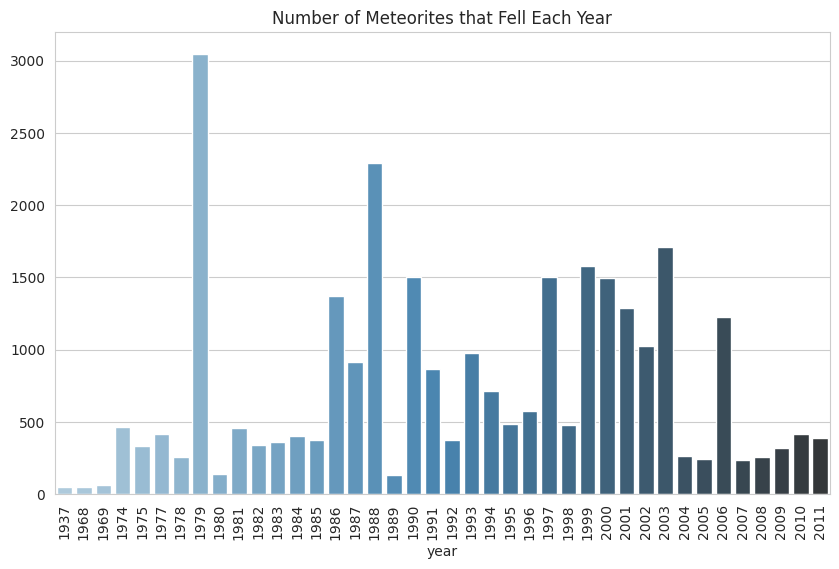

In [5]:
# Calculate how many meteorites fell in each year
year_counts = df.groupby("year").count()["name"]

# Drop years with less than 10 meteorites
year_counts = year_counts[year_counts > 50]

# remove the decmial point from the year
year_counts.index = year_counts.index.astype(int)

# using sns Plot the number of meteorites that fell each year ordered by count
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Number of Meteorites that Fell Each Year")
plt.xticks(rotation=90)
sns.barplot(x=year_counts.index, y=year_counts.values, palette="Blues_d")

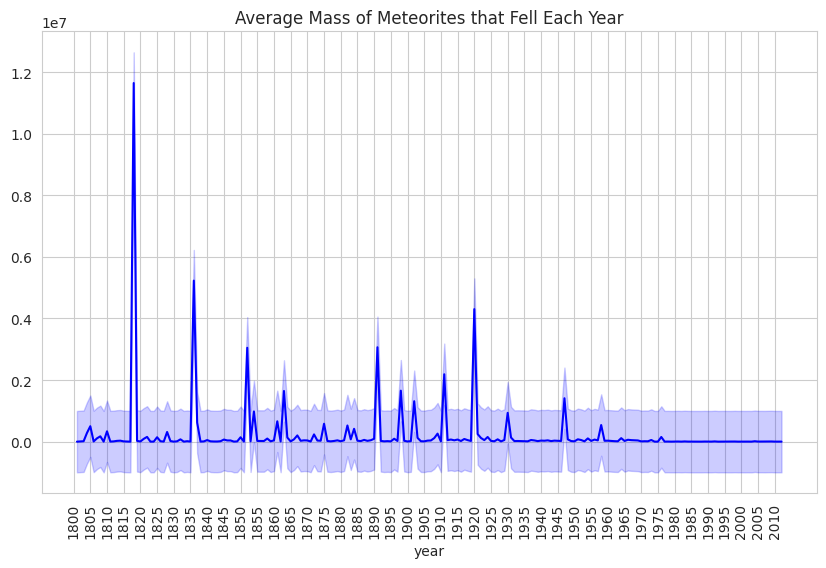

In [6]:
# Plot the average mass of the meteorites ordered by year
# only include years between 1937 and 1980
mass_by_year = df[(df["year"] >= 1800) & (df["year"] <= 2012)].groupby("year").mean()["mass (g)"]


# Plot the mean mass of the meteorites that fell each year along with the standard deviation
plt.figure(figsize=(10, 6))
plt.title("Average Mass of Meteorites that Fell Each Year")
plt.xticks(np.arange(1800, 2015, 5),rotation=90)
sns.lineplot(x=mass_by_year.index, y=mass_by_year.values, color="blue")
plt.fill_between(
    x=mass_by_year.index,
    y1=mass_by_year.values - mass_by_year.std(),
    y2=mass_by_year.values + mass_by_year.std(),
    alpha=0.2,
    color="blue",
)

Text(0.5, 1.0, 'Latitude vs Longitude of Meteorite Landings')

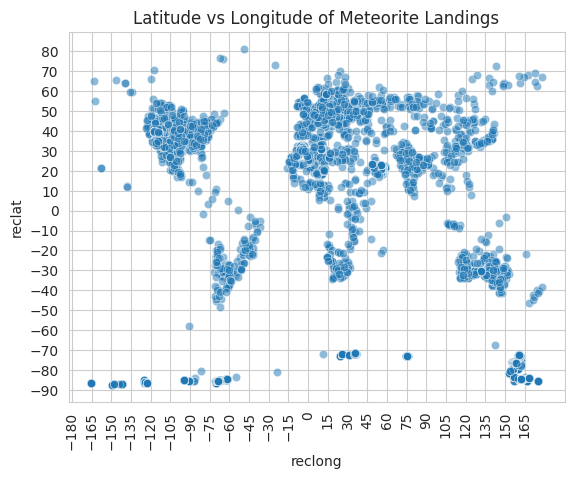

In [7]:
# Print a plot of reclat vs reclong
sns.scatterplot(x=df["reclong"], y=df["reclat"], alpha=0.5)
plt.xticks(np.arange(-180, 180, 15), rotation=90)
plt.yticks(np.arange(-90, 90, 10))
plt.title("Latitude vs Longitude of Meteorite Landings")


<AxesSubplot:title={'center':'Number of Meteorites that Fell in Each Location'}, xlabel='reclong', ylabel='reclat'>

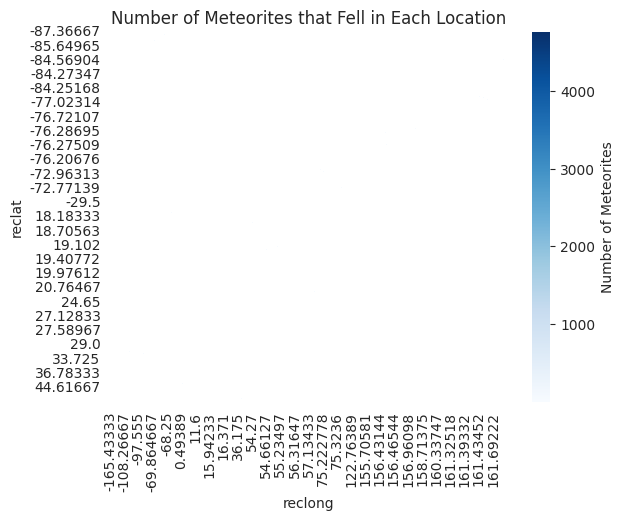

In [9]:
# plt.title("Number of Meteorites that Fell in Each Location")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.xticks(np.arange(-180, 180, 30))
# plt.yticks(np.arange(-90, 90, 15))
# sns.heatmap(
#     df.groupby(["reclat", "reclong"]).count()["mass (g)"].unstack(),
#     cmap="Blues",
#     cbar_kws={"label": "Number of Meteorites"},
# )

### MAP STUF

In [10]:
# show a map of the world with the meteorite landings
import folium
from folium.plugins import HeatMap

# Create a map of the world
m = folium.Map(location=[0, 0], max_zoom = 16, zoom_start=12)

heat_df = df[["reclat", "reclong"]].dropna()
heat_df = heat_df.dropna(axis=0, subset=["reclat", "reclong"])
heat_data = [[row["reclat"], row["reclong"]] for _, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(m)

# Show the map
m

### MACHINE LEARNING

In [11]:
# down select to recclass and mass 
tdf = df[["recclass", "mass (g)", "reclat", "reclong", "year"]].dropna()
tdf = tdf[tdf["year"] > 1975]
tdf = tdf[tdf["year"] < 2015]
tdf = tdf[tdf["mass (g)"] < 1000]

ty = tdf["year"]
tdf

# convert recclass to a LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tdf["recclass"] = le.fit_transform(tdf["recclass"])
tdf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tdf, ty, test_size=0.42, random_state=42
)
X_train

,recclass,mass (g),reclat,reclong,year
14767,136,200.20,-72.981944,75.246389,2003.0
5048,237,160.70,-80.250000,153.500000,1978.0
8230,128,19.00,18.978330,54.408330,2003.0
39598,128,2.93,-71.500000,35.666670,1979.0
43064,128,10.83,-71.500000,35.666670,1986.0
...,...,...,...,...,...
36977,141,931.90,20.819000,57.263670,2001.0
7633,270,38.30,18.985830,54.600670,2001.0
2084,237,951.50,-76.843910,156.367090,1985.0
23334,30,13.43,-79.683330,155.750000,2000.0


<AxesSubplot:>

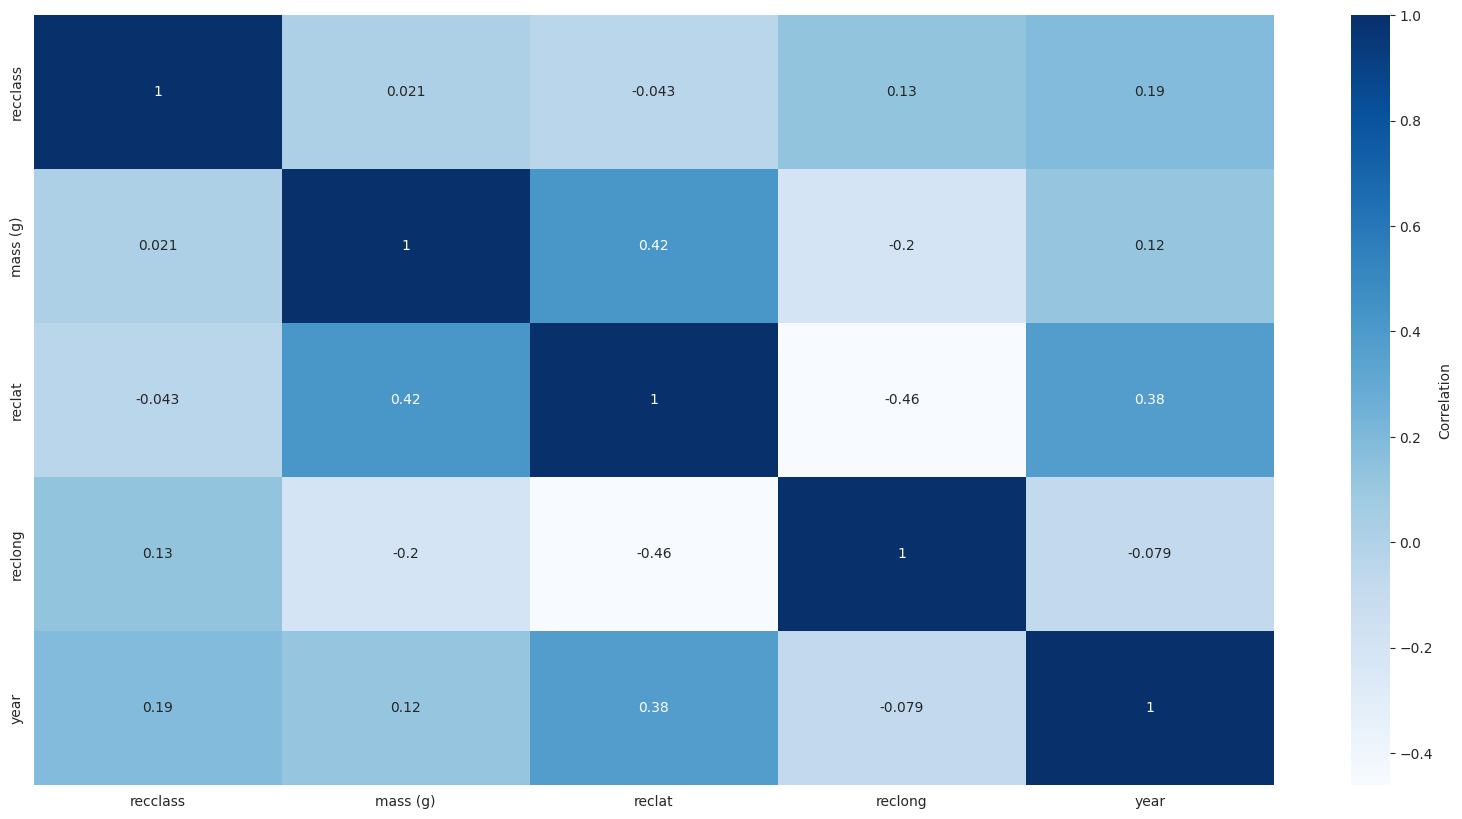

In [12]:

plt.figure(figsize=(20, 10))
sns.heatmap(
    tdf.corr(),
    annot=True,
    cmap="Blues",
    cbar_kws={"label": "Correlation"},
)
